In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Loading Dataset

In [2]:
import os

DATASET_PATH = "dataset"
INPUT_SHAPE = (256, 256)

X, y = [], []

label_map_dict = dict()

class_hist = []
for class_index, class_ in enumerate(os.listdir(DATASET_PATH)):
    
    label_map_dict[class_index] = class_
    
    class_path = os.path.join(DATASET_PATH, class_)

    for img_name in os.listdir(class_path):
        class_hist.append(class_)
        
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        
        img = cv2.resize(img, INPUT_SHAPE, interpolation=cv2.INTER_AREA)
        
        X.append(img)
        y.append(class_index)
       
X = np.array(X, dtype=np.uint8)
y = np.array(y, dtype=np.int64)

print("X shape", X.shape)
print("y shape", y.shape)

X shape (2152, 256, 256, 3)
y shape (2152,)


### Plot the Loaded Dataset

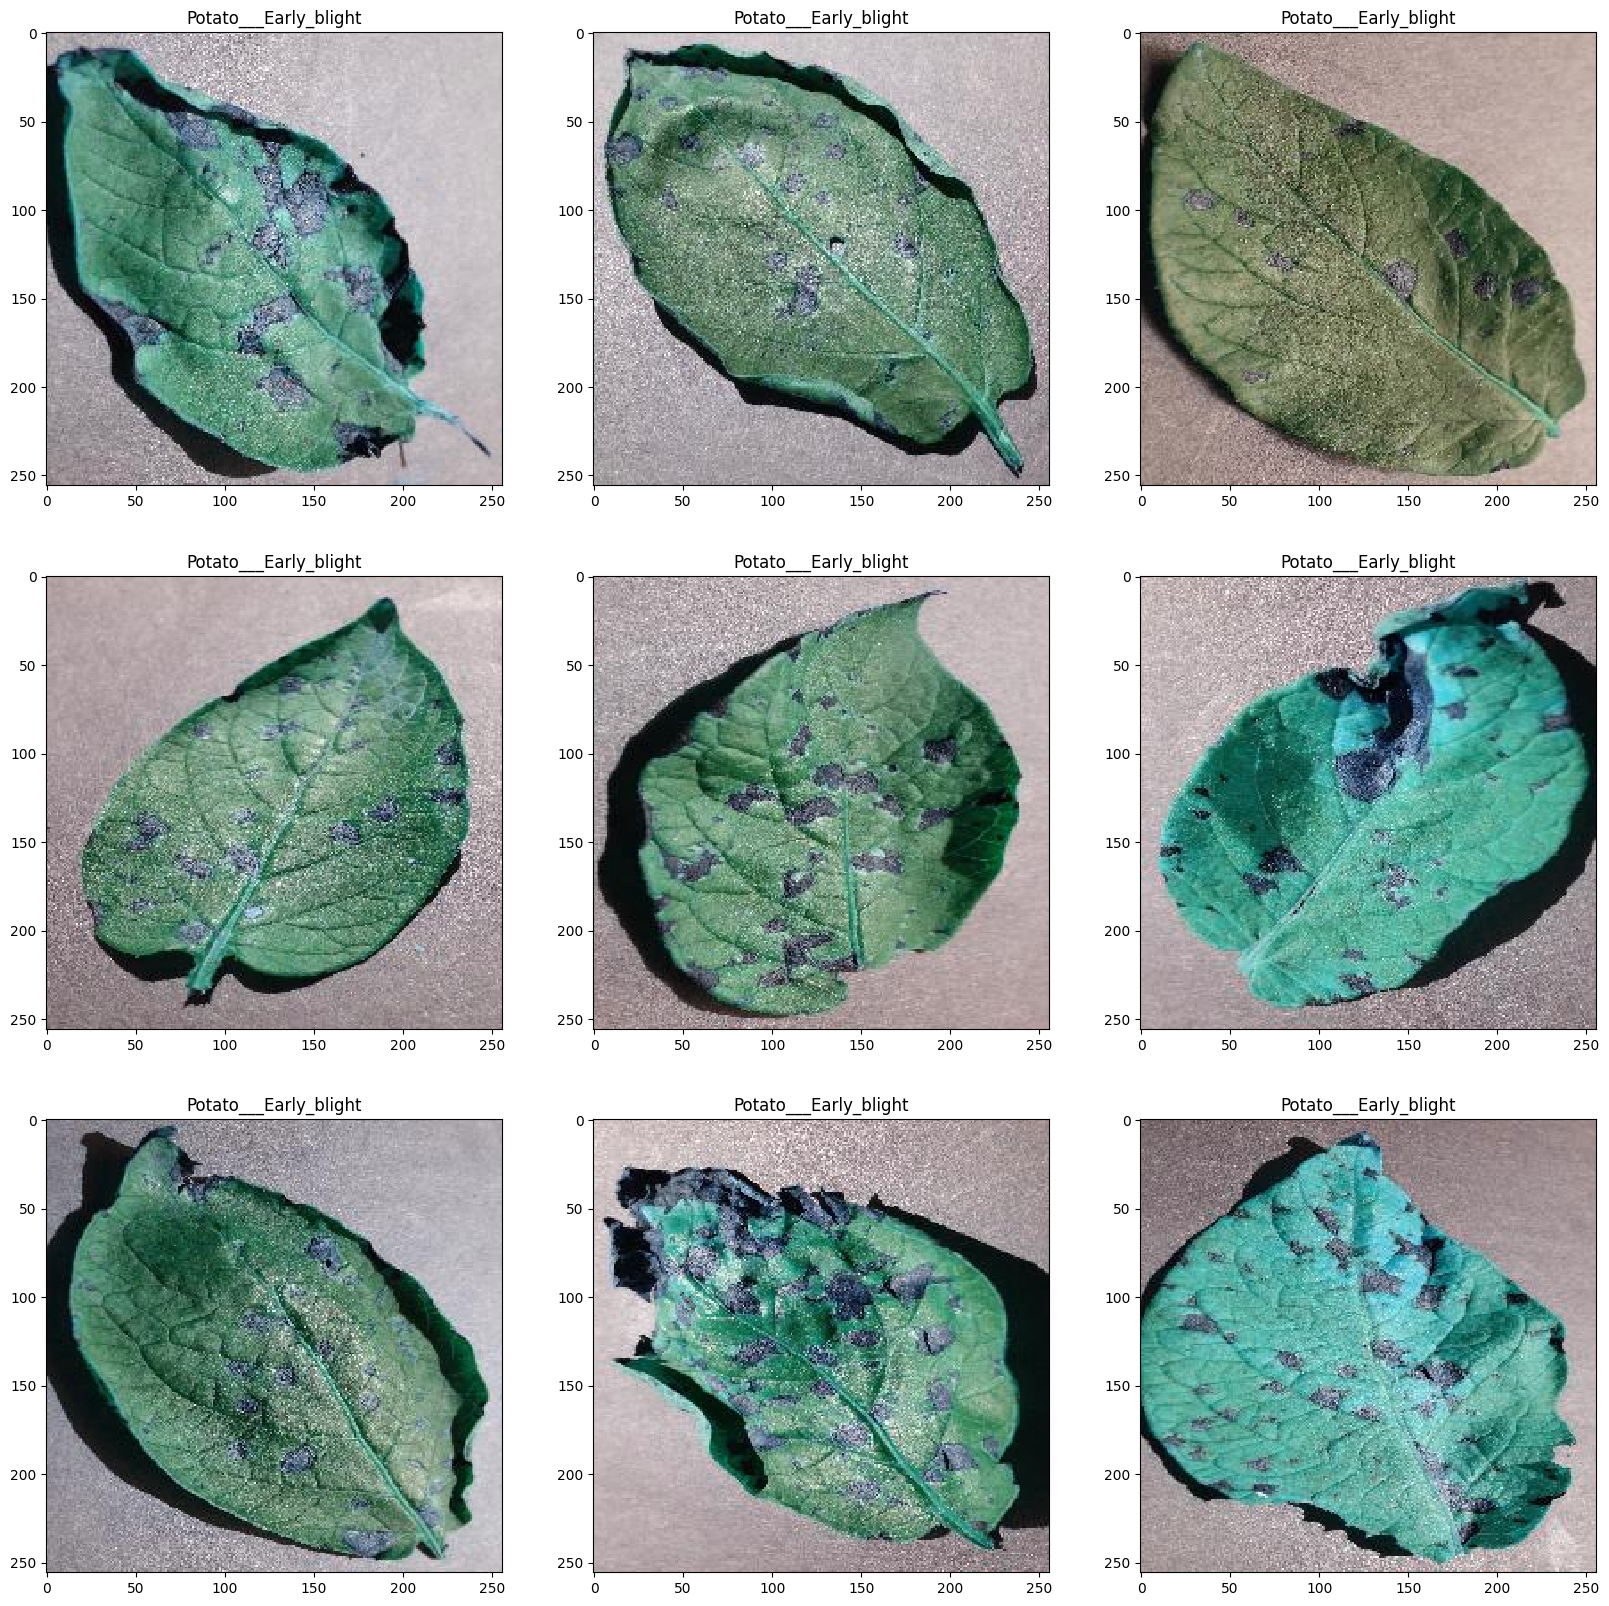

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import os

def plotSamples(X, random=False):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    index = 0
    for row in range(3):
        for col in range(3):
            
            if random:
                index = random.randint(0, len(X))
            else:
                index += 1
                
            image, class_index = X[index], y[index]
            # get the class name
            actual_class = label_map_dict[class_index]
            
            if len(image.shape) == 2:
                axes[row][col].imshow(image, cmap="gray", interpolation='nearest', aspect='auto')
            else:
                axes[row][col].imshow(image, interpolation='nearest', aspect='auto')

            axes[row][col].set_title(actual_class)

    plt.show()
    
plotSamples(X)

### Plot Class Histrogram

Class 			 Count
Potato___Early_blight 	 1000
Potato___healthy 	 152
Potato___Late_blight 	 1000


<function matplotlib.pyplot.show(close=None, block=None)>

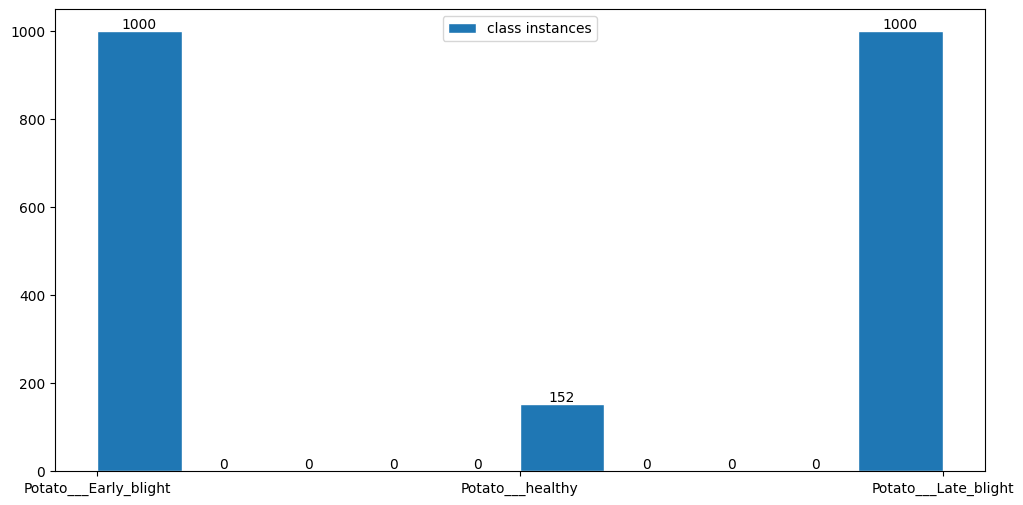

In [4]:
import collections
counter = collections.Counter(class_hist)

print(f"Class \t\t\t Count")
for class_index, count in counter.items():
    print(f"{class_index} \t {count}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
freq, bins, patches = plt.hist(class_hist, edgecolor='white', label='class instances')

bin_centers = np.diff(bins) * 0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),             
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
  n += 1

plt.legend()
plt.show

## Preprocessing 1: Data Augmentation

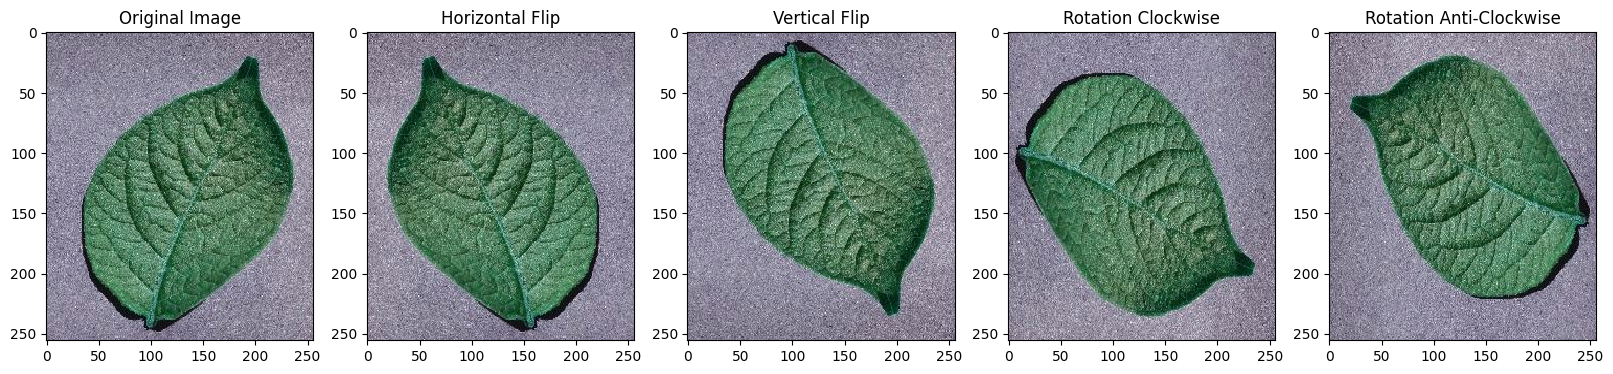

In [5]:
import os
import imgaug as ia
import imgaug.augmenters as iaa

hflip = iaa.Fliplr(p=1.0)
vflip= iaa.Flipud(p=1.0) 
rot_c = iaa.Affine(rotate=(90, 90))
rot_ac = iaa.Affine(rotate=(-90, -90))

test_image = X[1111]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes[0].imshow(test_image, interpolation='nearest', aspect='auto')
axes[0].set_title("Original Image")

# horizontally flip the image and plot
img_opted = hflip.augment_image(test_image)
axes[1].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[1].set_title("Horizontal Flip")

# vertically flip the image and plot
img_opted = vflip.augment_image(test_image)
axes[2].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[2].set_title("Vertical Flip")

# rotate the image 90 degrees Clockwise and plot
img_opted = rot_c.augment_image(test_image)
axes[3].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[3].set_title("Rotation Clockwise")

# rotate the image 90 degrees Anti-Clockwise and plot
img_opted = rot_ac.augment_image(test_image)
axes[4].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[4].set_title("Rotation Anti-Clockwise")

plt.show()

#### Apply Augmentation to the Dataset class Potato___healthy

In [6]:
import os
import imgaug as ia
import imgaug.augmenters as iaa

hflip = iaa.Fliplr(p=1.0)
vflip= iaa.Flipud(p=1.0) 
rot_c = iaa.Affine(rotate=(90, 90))
rot_ac = iaa.Affine(rotate=(-90, -90))

X_aug, y_aug = [], []
class_hist_aug = []
for index in range(len(X)):
    
    image, class_index = X[index], y[index]
    
    if label_map_dict[class_index] == "Potato___healthy":
        X_aug.append(image)
        y_aug.append(class_index)
        class_hist_aug.append(label_map_dict[class_index])
        
        for i_, op in enumerate([hflip, vflip, rot_c, rot_ac]):
            img_opted = op.augment_image(image)
            X_aug.append(img_opted)
            y_aug.append(class_index)
            class_hist_aug.append(label_map_dict[class_index])

    else:
        X_aug.append(image)
        y_aug.append(class_index)
        class_hist_aug.append(label_map_dict[class_index])

X_aug = np.array(X_aug, dtype=np.uint8)
y_aug = np.array(y_aug, dtype=np.int64)

print("X shape", X_aug.shape)
print("y shape", y_aug.shape)

X shape (2760, 256, 256, 3)
y shape (2760,)


### Plot Class Histrogram of the Augmented Dataset

Class 			 Count
Potato___Early_blight 	 1000
Potato___healthy 	 760
Potato___Late_blight 	 1000


<function matplotlib.pyplot.show(close=None, block=None)>

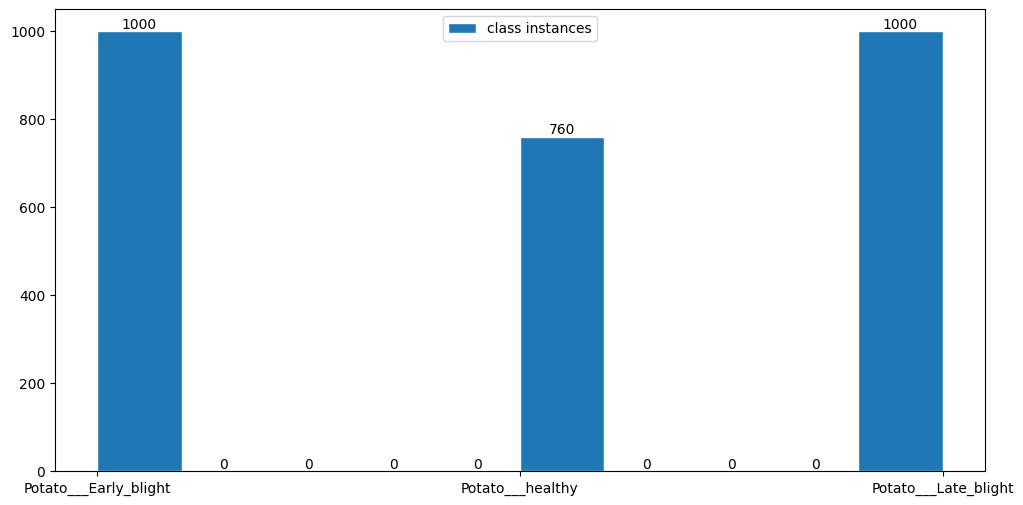

In [7]:
import collections
counter = collections.Counter(class_hist_aug)

print(f"Class \t\t\t Count")
for class_index, count in counter.items():
    print(f"{class_index} \t {count}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
freq, bins, patches = plt.hist(class_hist_aug, edgecolor='white', label='class instances')

bin_centers = np.diff(bins) * 0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),             
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
  n += 1

plt.legend()
plt.show

## Preprocessing 2: Apply Gaussian Smoothing

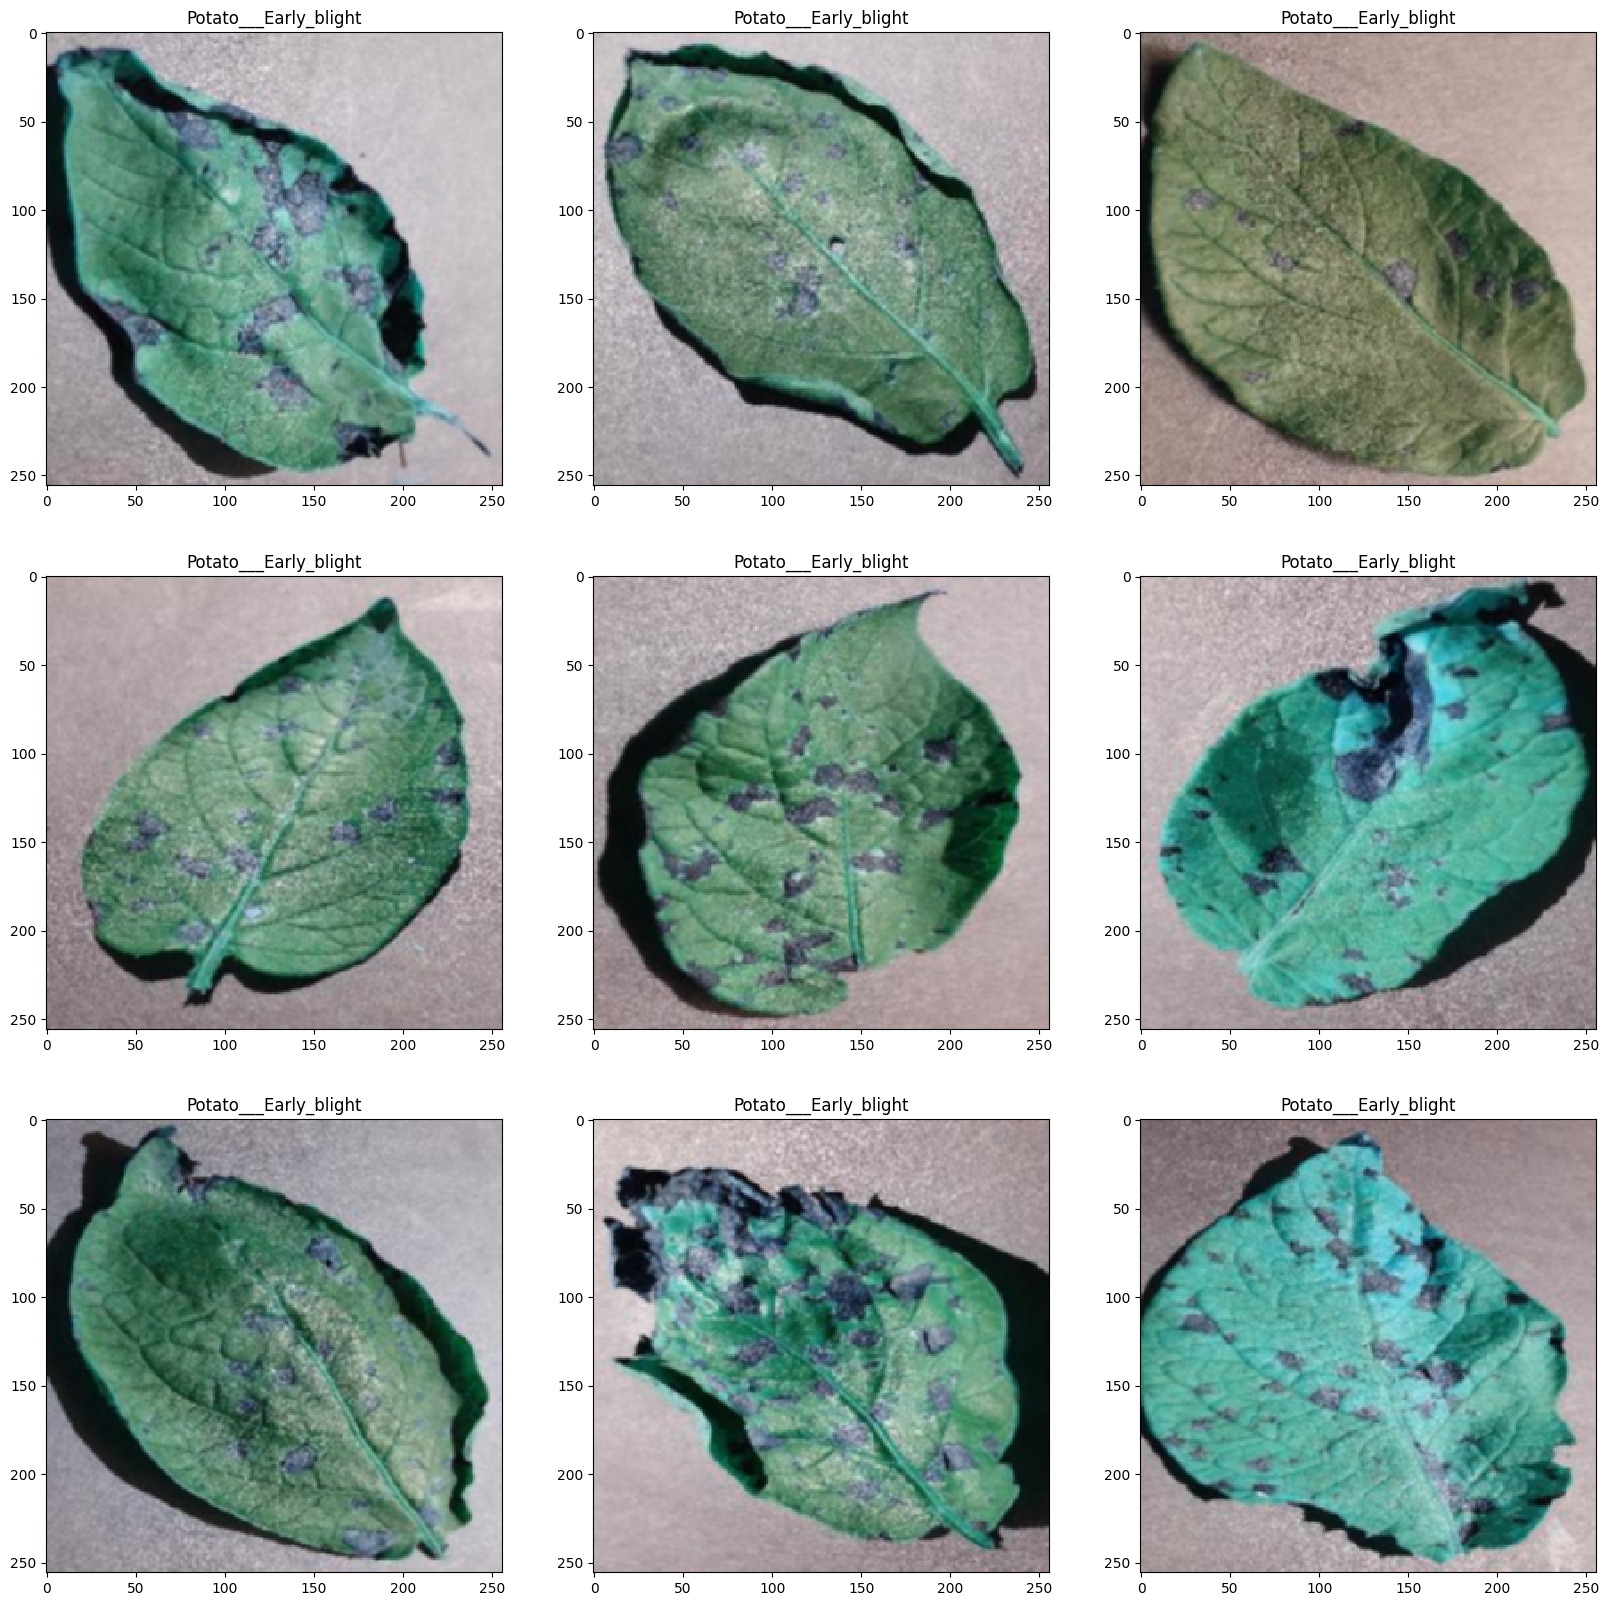

In [8]:
import cv2 

X_smoothed = [None for _ in range(len(X_aug))]
kernel_size = (3, 3)
for index in range(len(X_aug)):
    img = X_aug[index]    
    blurImg = cv2.GaussianBlur(img, kernel_size, 0)
    
    X_smoothed[index] = blurImg
    
plotSamples(X_smoothed)

## Preprocessing 3: Image Normalization

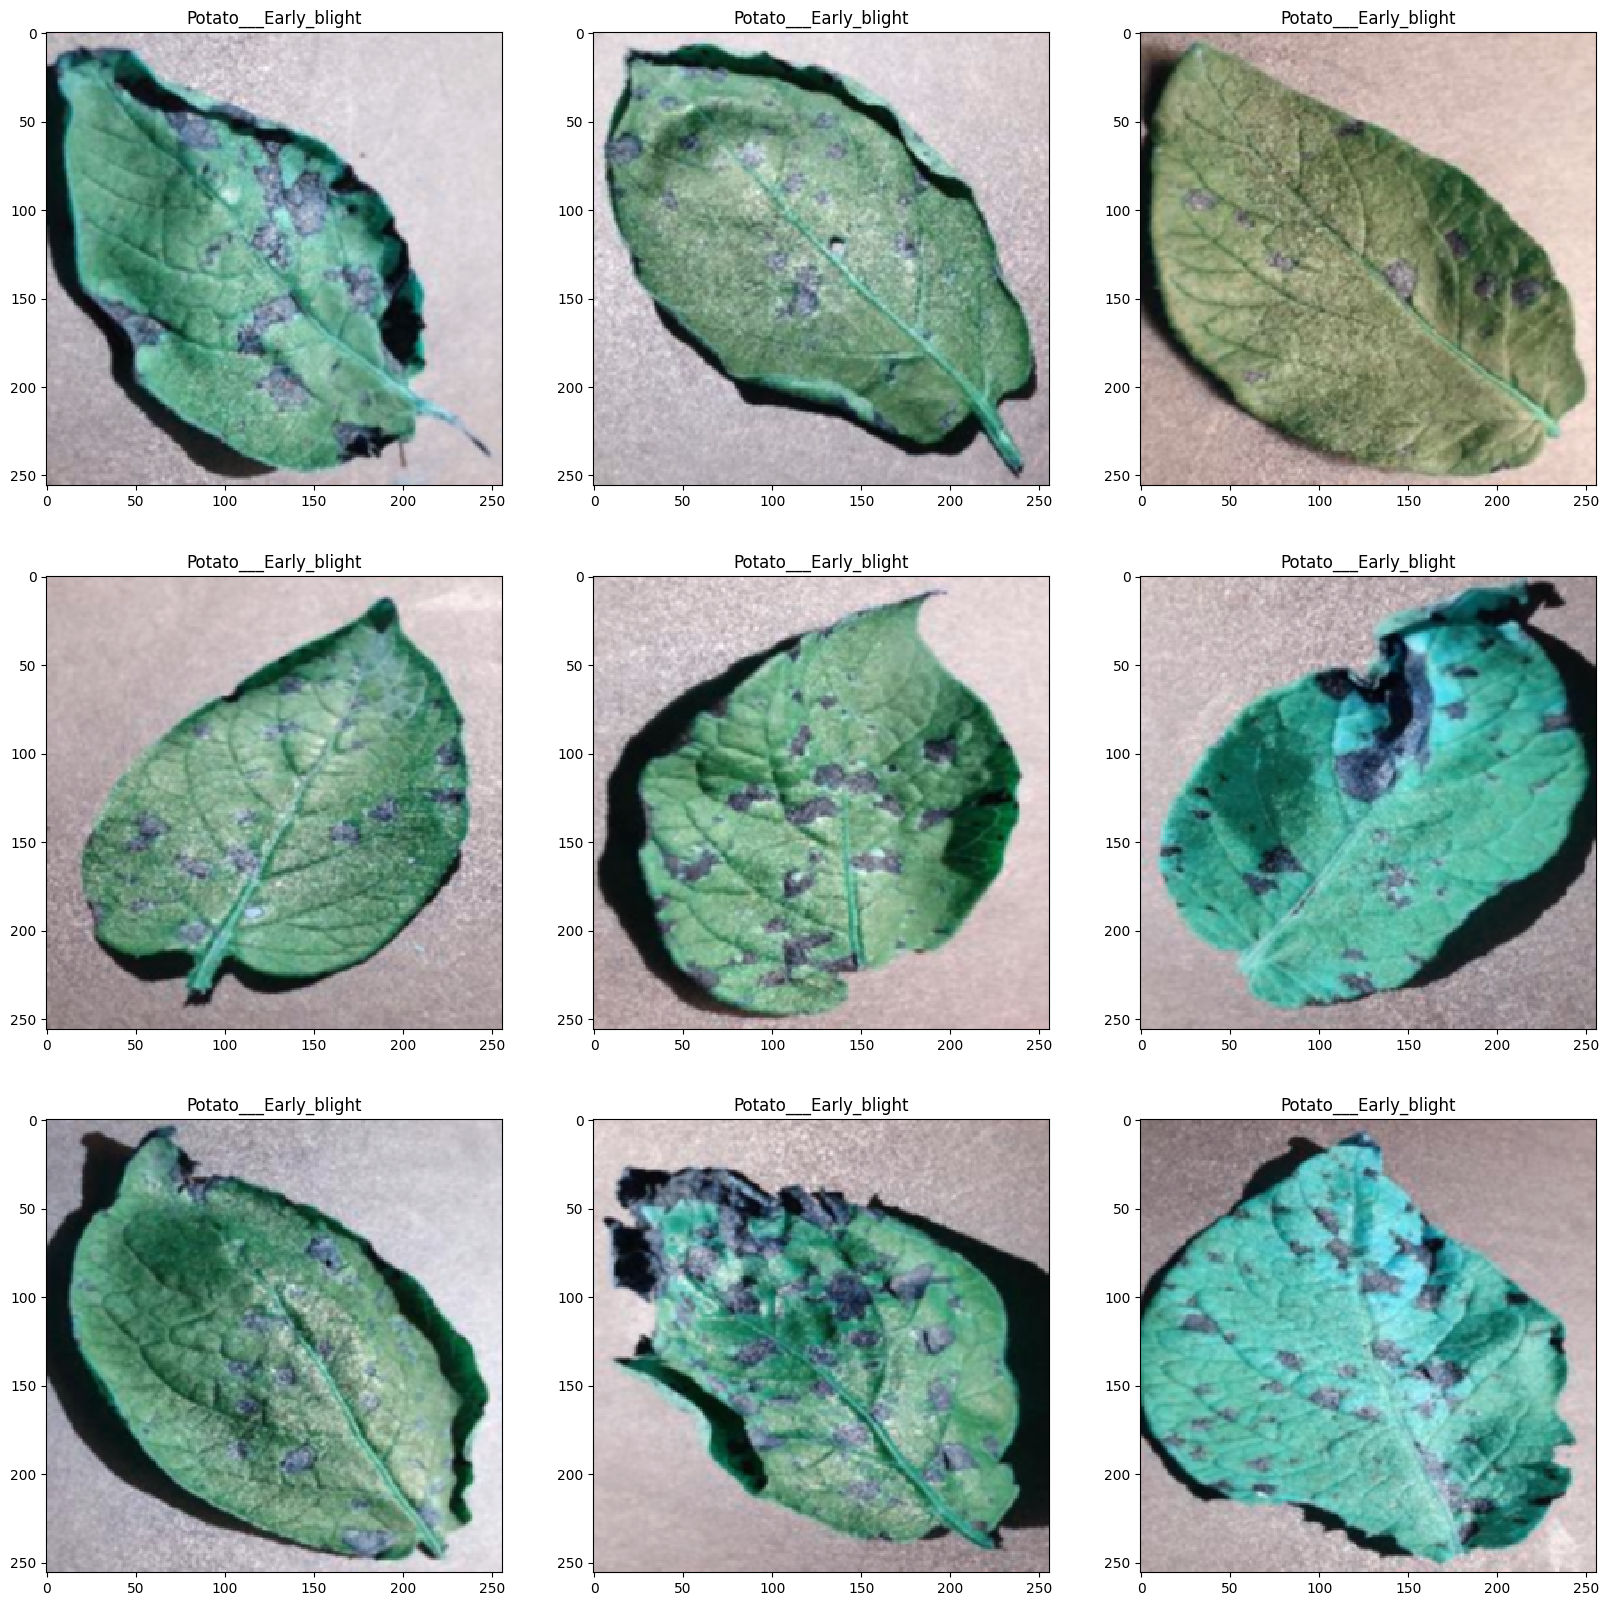

In [9]:
X_normalized = [None for _ in range(len(X_smoothed))]

for index in range(len(X_smoothed)):
    img = X_smoothed[index]
    
    # apply normalization formula here
    # new_range = (x - old_range_minimum) / (old_range_maximum - old_range_minimum)
    norm_image = (img - np.min(img)) / (np.max(img) - np.min(img))
    X_normalized[index] = norm_image

X_normalized = np.array(X_normalized, dtype=np.float32)

# plot samples
plotSamples(X_normalized)

## Preprocessing 4: Principle Components Analysis - Dimentionality Reduction

In [10]:
from sklearn.decomposition import PCA
import numpy as np

print("Shape of the original dataset:", X_normalized.shape)
X_reshaped = X_normalized.reshape((len(X_normalized), -1))
print("Shape of the dataset when flattened:", X_reshaped.shape)

pca = PCA(n_components=500)
pca.fit(X_reshaped)

print("Sum of explained variance ratio for each Principle Component:", sum(pca.explained_variance_ratio_))

X_PCA = pca.transform(X_reshaped)

print("Shape of the dataset after applying PCA:", X_PCA.shape)

Shape of the original dataset: (2760, 256, 256, 3)
Shape of the dataset when flattened: (2760, 196608)
Sum of explained variance ratio for each Principle Component: 0.8924593836563872
Shape of the dataset after applying PCA: (2760, 500)


# Splitting the Dataset into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_PCA, y_aug, test_size=TEST_SIZE, random_state=42, shuffle=True)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (2208, 500)
y_train shape (2208,)
X_test shape (552, 500)
y_test shape (552,)


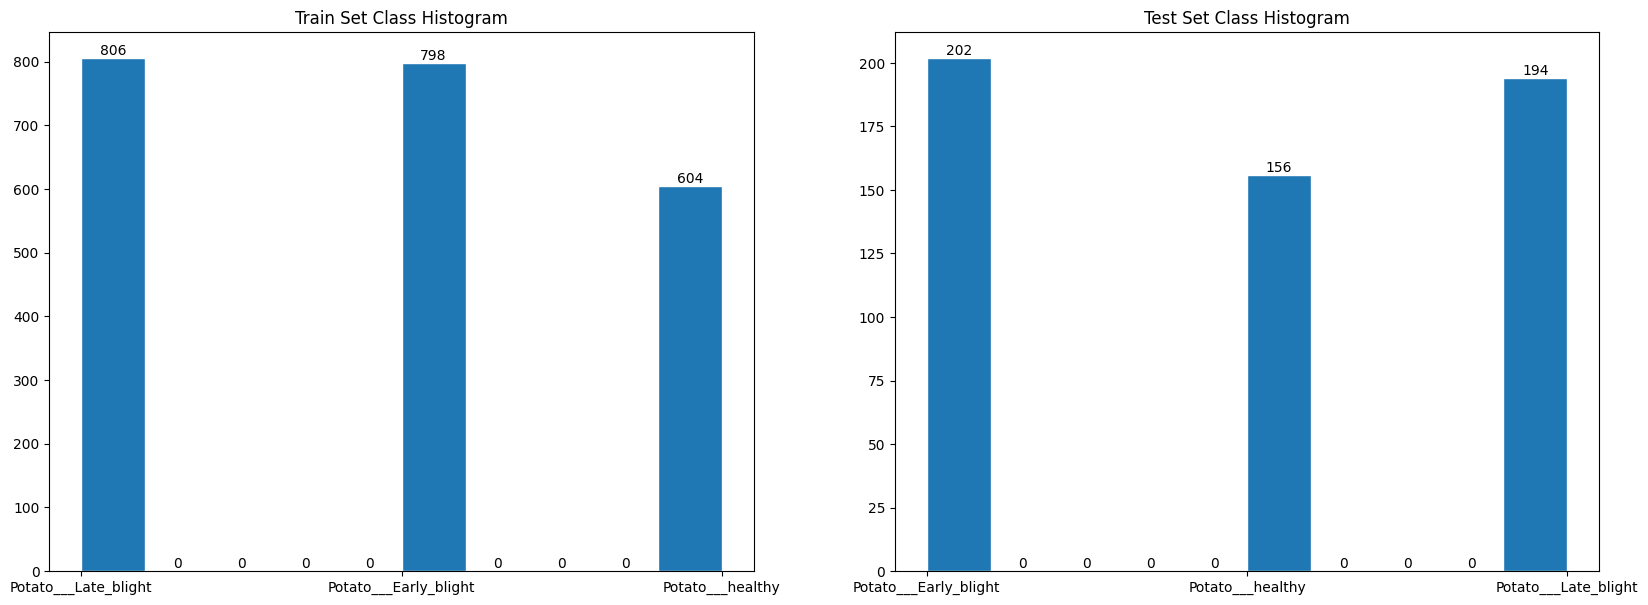

In [12]:
hist_test = []
for label in y_test:
    hist_test.append(label_map_dict[label])

hist_train = []
for label in y_train:
    hist_train.append(label_map_dict[label])
    
def plotHist(freq, bins, patches, axis=0):
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      axes[axis].annotate("{}".format(height),
                   xy = (x, height),             
                   xytext = (0,0.2),             
                   textcoords = "offset points", 
                   ha = 'center', va = 'bottom')
      n += 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# plot training set class histogram
freq, bins, patches = axes[0].hist(hist_train, edgecolor='white')
axes[0].set_title("Train Set Class Histogram")
plotHist(freq, bins, patches, axis=0)

# plot testing set class histogram
freq, bins, patches = axes[1].hist(hist_test, edgecolor='white')
axes[1].set_title("Test Set Class Histogram")
plotHist(freq, bins, patches, axis=1)
plt.show()

### KNN Classifier with GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

# param_grid = dict({
#     "n_neighbors": [1, 3, 5, 7, 9],
#     "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     "leaf_size": [20, 30, 40, 50]
# })

param_grid = dict({
    "n_neighbors": [ 5 ],
    "algorithm": ["brute"],
    "leaf_size": [ 40 ]
})

neigh_grid = GridSearchCV(neigh, param_grid, refit=True, n_jobs=-1)
neigh_grid.fit(X_train, y_train)

print("Accuracy Score on the Test Set for the best Estimator")
neigh_grid.best_estimator_.score(X_test, y_test)
# neigh_grid.cv_results_

Accuracy Score on the Test Set for the best Estimator


0.7844202898550725

### Support Vector Classifier with GridSearchCV

In [14]:
from sklearn.svm import SVC

svc_clf = SVC()

# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 

param_grid = {'C': [10], 
              'gamma': [0.0001],
              'kernel': ['rbf']} 
  
svc_grid = GridSearchCV(svc_clf, param_grid, refit=True, n_jobs=-1, verbose=2)

svc_grid.fit(X_train, y_train)

print("Accuracy Score on the Test Set for the best Estimator")
svc_grid.best_estimator_.score(X_test, y_test)
# svc_grid.cv_results_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy Score on the Test Set for the best Estimator


0.9239130434782609

### Choosing the best estimator

In [15]:
best_classifier = svc_grid.best_estimator_

# Evaluating Model Performance on the Test Data

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

predictions = best_classifier.predict(X_test)

accuracy_score_ = accuracy_score(predictions, y_test)
precision_score_ = precision_score(predictions, y_test, average="weighted")
recall_score_ = recall_score(predictions, y_test, average="weighted")
f1_score_ = f1_score(predictions, y_test, average="weighted")

print("The following matrices are for the best classifier on the test set.")
print("accuracy:", accuracy_score_)
print("precision:", precision_score_)
print("recall:", recall_score_)
print("f1:", f1_score_)

The following matrices are for the best classifier on the test set.
accuracy: 0.9239130434782609
precision: 0.9236745055052346
recall: 0.9239130434782609
f1: 0.9233709931249715


## Save Model and Clear RAM

In [17]:
import pickle 

model_name = 'Potato___Disease_Detection_SVC.pkl'

with open(model_name, 'wb') as f:      
    # source, destination 
    pickle.dump(best_classifier, f)

## Loading the pre-saved model

In [18]:
import pickle 

model_loaded = pickle.load(
    open(model_name, 'rb')
)

## Making Predictions using trained model

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import os

print("1 = Correctly Classified")
print("0 = Wrongly Classified")
print()
print(f"Status \t Actual Class \t\t Predicted Class")
for _ in range(20):
    index = random.randint(0, len(X_test) - 1)
    image, label = X_test[index], y_test[index]
    actual_class = label_map_dict[label]

    predictions = model_loaded.predict([image])
    prediction = predictions[0]
    predicted_class = label_map_dict[prediction]
    
    flag = "1" if actual_class == predicted_class else "0"
    label = f"{flag} \t {actual_class} \t {predicted_class}"
    print(label)

1 = Correctly Classified
0 = Wrongly Classified

Status 	 Actual Class 		 Predicted Class
1 	 Potato___healthy 	 Potato___healthy
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___healthy 	 Potato___healthy
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___healthy 	 Potato___healthy
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___healthy 	 Potato___healthy
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___Late_blight 	 Potato___Late_blight
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___Late_blight 	 Potato___Late_blight
1 	 Potato___Late_blight 	 Potato___Late_blight
1 	 Potato___healthy 	 Potato___healthy
1 	 Potato___Late_blight 	 Potato___Late_blight
1 	 Potato___Late_blight 	 Potato___Late_blight
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___healthy 	 Potato___healthy
1 	 Potato___Early_blight 	 Potato___Early_blight
1 	 Potato___Late_blight 	 Pot